# IS445 General Public View

### Requirements
#### This notebook requires a virtual environment that includes packages for Python 3.10 and Jupyter.

### Dataset Info
#### Name of Dataset: HURDAT2 
#### Dataset Link: https://data.world/noaa/hurdat2
#### Size: 3362 KB

### Dataset Characteristics and Licensing Information
#### Licensing: "The information on National Weather Service (NWS) Web pages are in the public domain, unless specifically noted otherwise, and may be used without charge for any lawful purpose so long as you do not: 1) claim it is your own (e.g., by claiming copyright for NWS information -- see below), 2) use it in a manner that implies an endorsement or affiliation with NOAA/NWS, or 3) modify its content and then present it as official government material. You also cannot present information of your own in a way that makes it appear to be official government information." For more information, follow the link https://www.weather.gov/disclaimer
#### Characteristics: "HURDAT2 contains the best track data for cyclones ranging all the way back to 1949 for those that originated in the Northeast and North Central Pacific, and 1851 for those that originated in the Atlantic. The dataset is a compilation of the post-storm analyses prepared by The National Hurricane Center and the Central Pacific Hurricane Center." For this project, I have opted to use data from storms occurring in the Atlantic only. 

In [1]:
import pandas as pd
import bqplot
import bqplot.pyplot as plt
import json
import pandas as pd 
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

In [2]:
#Import data, ensure dates render in date format, and check it displays correctly
hurricanes = pd.read_csv("hurricane_data_final.csv",index_col=0, parse_dates=True)
hurricanes['date'] = pd.to_datetime(hurricanes['date'], format='ISO8601')
hurricanes.tail()

,name,year,cyclone_of_the_year,num_of_track_entries,date,time,record_identifier,status_of_system,latitude,longitude,...,34kt_SW,34kt_NW,50kt_NE,50kt_SE,50kt_SW,50kt_NW,64kt_NE,64kt_SE,64kt_SW,64kt_NW
basin,,,,,,,,,,,,,,,,,,,,,
AL,KATE,2015,12,20,2015-11-12,1200,NaN,EX,41.3N,50.4W,...,180.0,120.0,120.0,120.0,60.0,0.0,0.0,0.0,0.0,0.0
AL,KATE,2015,12,20,2015-11-12,1800,NaN,EX,41.9N,49.9W,...,180.0,120.0,120.0,120.0,60.0,0.0,0.0,0.0,0.0,0.0
AL,KATE,2015,12,20,2015-11-13,0,NaN,EX,41.5N,49.2W,...,200.0,220.0,120.0,120.0,60.0,0.0,0.0,0.0,0.0,0.0
AL,KATE,2015,12,20,2015-11-13,600,NaN,EX,40.8N,47.5W,...,180.0,220.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL,KATE,2015,12,20,2015-11-13,1200,NaN,EX,40.7N,45.4W,...,150.0,220.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#filter dataframe to only show hurricanes of the most recent 50 years 1965-2015
hurricanes_50 = hurricanes[hurricanes['year'] >= 1965]
hurricanes_50

,name,year,cyclone_of_the_year,num_of_track_entries,date,time,record_identifier,status_of_system,latitude,longitude,...,34kt_SW,34kt_NW,50kt_NE,50kt_SE,50kt_SW,50kt_NW,64kt_NE,64kt_SE,64kt_SW,64kt_NW
basin,,,,,,,,,,,,,,,,,,,,,
AL,UNNAMED,1965,1,29,1965-06-11,600,NaN,TD,12.5N,91.3W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL,UNNAMED,1965,1,29,1965-06-11,1200,NaN,TD,13.6N,91.3W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL,UNNAMED,1965,1,29,1965-06-11,1800,NaN,TD,14.6N,91.3W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL,UNNAMED,1965,1,29,1965-06-12,0,NaN,TD,15.7N,91.3W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL,UNNAMED,1965,1,29,1965-06-12,600,NaN,TD,16.8N,91.1W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL,KATE,2015,12,20,2015-11-12,1200,NaN,EX,41.3N,50.4W,...,180.0,120.0,120.0,120.0,60.0,0.0,0.0,0.0,0.0,0.0
AL,KATE,2015,12,20,2015-11-12,1800,NaN,EX,41.9N,49.9W,...,180.0,120.0,120.0,120.0,60.0,0.0,0.0,0.0,0.0,0.0
AL,KATE,2015,12,20,2015-11-13,0,NaN,EX,41.5N,49.2W,...,200.0,220.0,120.0,120.0,60.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#let's make a scatter plot to show how storm wind speed has changed over the past 50 years
plt.figure(figsize=(14, 8))
date_range = hurricanes_50.loc['1965-06-11':'2015-11-13']

#let's throw out negative values as this would only confuse the public and requires requesting extra info from NOAA as to 
#why those values exist at all
wind_changes = hurricanes_50[hurricanes_50['max_sustained_wind'] >= 0]

#let's find the mean wind speed of each year and then check that our new dataframe holds those values
grouped_wind = wind_changes.groupby('year')['max_sustained_wind'].mean().round(1).reset_index(name='average_sustained_winds')
grouped_wind

,year,average_sustained_winds
0,1965,55.9
1,1966,57.7
2,1967,57.9
3,1968,38.7
4,1969,47.4
5,1970,34.0
6,1971,40.4
7,1972,35.0
8,1973,41.2
9,1974,40.8


<Figure size 1400x800 with 0 Axes>

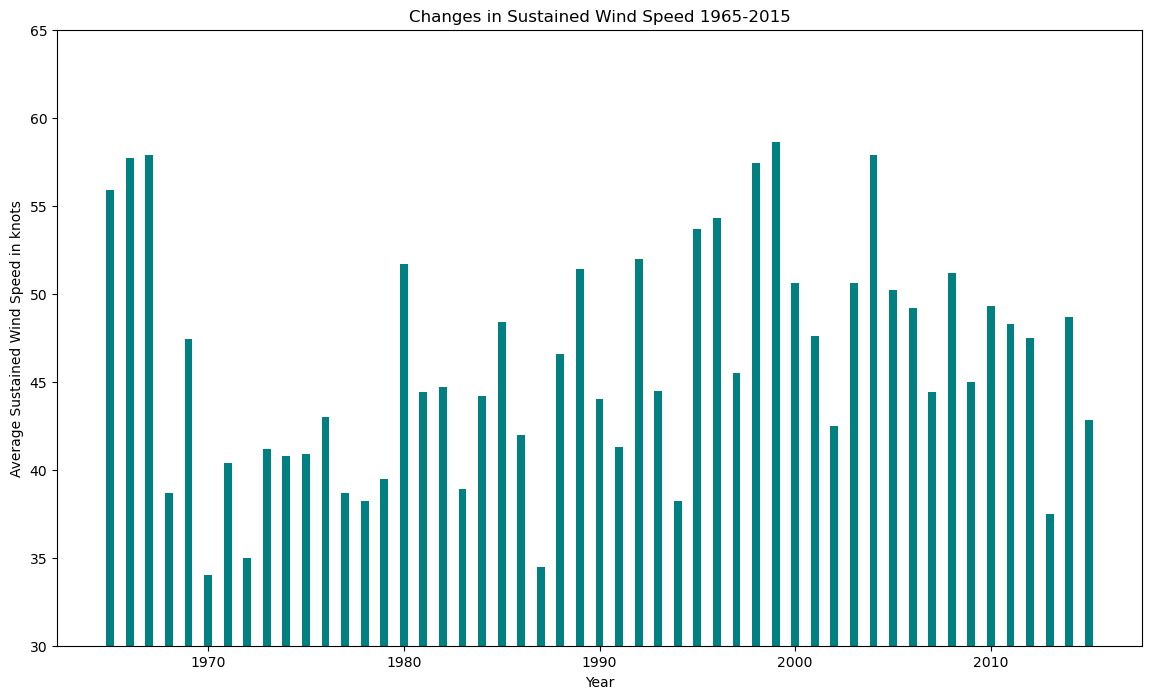

In [5]:
#let's make a bar graph to show how these values have changed over 50 years
year = grouped_wind['year']
winds = grouped_wind['average_sustained_winds']
plt.figure(figsize=(14, 8))
plt.ylim((30,65))

#create the bar graph
plt.bar(year, winds, color='teal', width=0.4)

plt.xlabel('Year')
plt.ylabel('Average Sustained Wind Speed in knots')
plt.title('Changes in Sustained Wind Speed 1965-2015')

plt.show()

In [6]:
#hurricane Katrina was a devastating storm which took place in 2005. Now that we've seen how wind speeds have changed over 
#50 years we can also look at hurricane katrina and plot how wind speed and pressure varied over the course of that storm.

#filter the named hurricanes to only look at the storm Katrina in 2005
katrina = hurricanes.loc[(hurricanes['name'] == 'KATRINA') & (hurricanes['year'] == 2005)]
katrina

,name,year,cyclone_of_the_year,num_of_track_entries,date,time,record_identifier,status_of_system,latitude,longitude,...,34kt_SW,34kt_NW,50kt_NE,50kt_SE,50kt_SW,50kt_NW,64kt_NE,64kt_SE,64kt_SW,64kt_NW
basin,,,,,,,,,,,,,,,,,,,,,
AL,KATRINA,2005,12,34,2005-08-23,1800,NaN,TD,23.1N,75.1W,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL,KATRINA,2005,12,34,2005-08-24,0,NaN,TD,23.4N,75.7W,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL,KATRINA,2005,12,34,2005-08-24,600,NaN,TD,23.8N,76.2W,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL,KATRINA,2005,12,34,2005-08-24,1200,NaN,TS,24.5N,76.5W,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL,KATRINA,2005,12,34,2005-08-24,1800,NaN,TS,25.4N,76.9W,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL,KATRINA,2005,12,34,2005-08-25,0,NaN,TS,26.0N,77.7W,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL,KATRINA,2005,12,34,2005-08-25,600,NaN,TS,26.1N,78.4W,...,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL,KATRINA,2005,12,34,2005-08-25,1200,NaN,TS,26.2N,79.0W,...,30.0,50.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
AL,KATRINA,2005,12,34,2005-08-25,1800,NaN,TS,26.2N,79.6W,...,50.0,60.0,25.0,25.0,20.0,20.0,0.0,0.0,0.0,0.0


<Figure size 4000x2400 with 0 Axes>

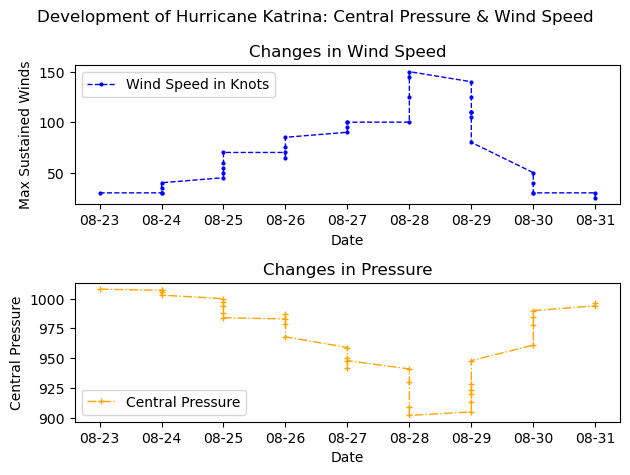

In [7]:
#create the figure and specify parameters you want for each subplot
fig = plt.figure(figsize=(20,12), dpi=200)
fig, axes = plt.subplots(nrows=2, ncols=1)

central_pressure = katrina['central_pressure']
wind_speed = katrina['max_sustained_wind']
date = katrina['date']

#create the subplot for wind speeds
axes[0].plot(date,wind_speed, color='blue', linestyle='--', linewidth=1, marker='o', markersize=2,
             label='Wind Speed in Knots')
axes[0].legend(loc='upper left')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Max Sustained Winds')
axes[0].set_title('Changes in Wind Speed')
date_form = DateFormatter("%m-%d")
axes[0].xaxis.set_major_formatter(date_form)

#create the subplot for pressure changes during a storm
axes[1].plot(date,central_pressure, color='orange', linestyle='-.', linewidth=1, marker='+', markersize=4,
             label='Central Pressure')
axes[1].legend(loc='lower left')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Central Pressure')
axes[1].set_title('Changes in Pressure')
date_form = DateFormatter("%m-%d")
axes[1].xaxis.set_major_formatter(date_form)

#name the combined figure and show it
fig.suptitle('Development of Hurricane Katrina: Central Pressure & Wind Speed')

plt.tight_layout()
plt.show()